In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [58]:
diamonds_df = pd.read_csv('diamonds.csv')

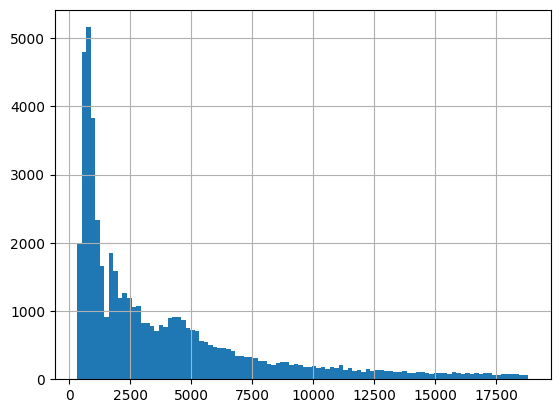

In [3]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

In [59]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [60]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [61]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [62]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [63]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [65]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.coef = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        y = y.reshape(-1)
        num_samples, num_features = X.shape

        self.coef = np.zeros(num_features)
        self.bias = 0

        for i in range(self.n_iter):
          y_pred = X @ self.coef + self.bias
          error = y_pred - y

          grad_coef = (X.T @ error) / num_samples
          grad_bias = np.mean(error)

          self.coef -= self.learning_rate * grad_coef
          self.bias -=self.learning_rate * grad_bias

          loss = np.mean(error ** 2) / 2
          self.loss_history.append(loss)
          print(f"Итерация {i+1} - loss: {loss}")
        return self

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return X @ self.coef + self.bias

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        return {
            "coef": self.coef,
            "intercept": self.bias
            }


In [66]:
np.random.seed(25)

model = LinearRegressorGD(learning_rate=0.1, n_iter=10000)

model.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
Итерация 5001 - loss: 912473.1768148327
Итерация 5002 - loss: 912462.7750839998
Итерация 5003 - loss: 912452.3746185185
Итерация 5004 - loss: 912441.9754178019
Итерация 5005 - loss: 912431.5774812646
Итерация 5006 - loss: 912421.1808083219
Итерация 5007 - loss: 912410.7853983892
Итерация 5008 - loss: 912400.3912508839
Итерация 5009 - loss: 912389.9983652233
Итерация 5010 - loss: 912379.6067408265
Итерация 5011 - loss: 912369.216377112
Итерация 5012 - loss: 912358.8272735015
Итерация 5013 - loss: 912348.439429415
Итерация 5014 - loss: 912338.0528442753
Итерация 5015 - loss: 912327.6675175044
Итерация 5016 - loss: 912317.2834485269
Итерация 5017 - loss: 912306.9006367666
Итерация 5018 - loss: 912296.51908165
Итерация 5019 - loss: 912286.1387826025
Итерация 5020 - loss: 912275.7597390517
Итерация 5021 - loss: 912265.3819504249
Итерация 5022 - loss: 912255.0054161518
Итерация 5023 - loss: 912244.6301356613
Итерация 5024 - 

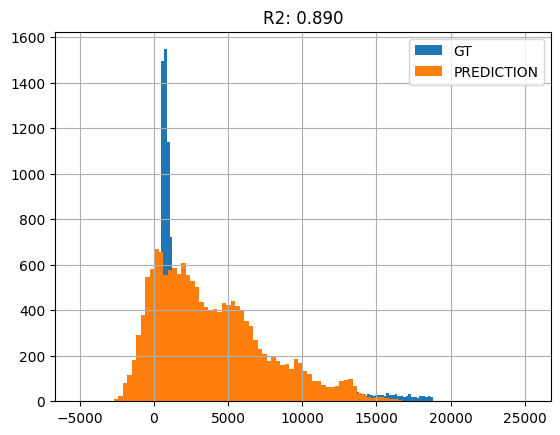

In [67]:
preds = model.predict(X_test)

# Проверяем модель LinearRegressorGD на выборке Diamonds
score = r2_score(y_test, preds)
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.hist(preds.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.legend()
plt.grid();

In [53]:
class SigmoidLayer:
  def __init__(self):
      self.result = None

  def forward(self, x):
    self.result = 1 / (1 + np.exp(-x))
    return self.result

  def derivative(self):
    return self.result * (1 - self.result) # по свойству производной сигмойды


class MLPRegressor:
  """
  Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
  обратного распространения ошибки
  """

  def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
      """
      Конструктор класса

      Параметры:
          hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
      скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
      нейронов, соответственно
          learning_rate (float): Скорость обучения
          n_iter (int): Количество итераций градиентного спуска
      """
      self.hidden_layer_sizes = hidden_layer_sizes
      self.learning_rate = learning_rate
      self.n_iter = n_iter
      self.weights = []
      self.biases = []
      self.activations = []

  def _initializeee(self, num_features, num_outputs):
    layer_sizes = [num_features] + list(self.hidden_layer_sizes) + [num_outputs]

    for i in range(len(layer_sizes) - 1):

      inn, out = layer_sizes[i], layer_sizes[i+1]

      w = np.random.randn(inn, out) * 0.01
      b = np.zeros((1, out))

      self.weights.append(w)
      self.biases.append(b)

      if i < len(layer_sizes) - 2:
        self.activations.append(SigmoidLayer())


  def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        self.z_values = []
        self.a_values = [X]

        for i in range(len(self.weights)):
          z = self.a_values[-1] @ self.weights[i] + self.biases[i]
          self.z_values.append(z)

          if i < len(self.activations):
            a = self.activations[i].forward(z)
          else:
            a = z

          self.a_values.append(a)

        return self.a_values[-1]

  def backward(self, X, y):
      """
      Реализация backward pass

       Возвращает:
        X (np.ndarray): Матрица признаков размера (n_samples, n_features)
        y (np.ndarray): Вектор таргета длины n_samples
      """
      m = X.shape[0]
      y = y.reshape(-1, 1)

      dz = (self.a_values[-1]-y)

      grads_w = []
      grads_b = []

      for i in reversed(range(len(self.weights))):
        dw = (self.a_values[i].T @ dz) / m
        db = np.mean(dz, axis=0, keepdims=True)

        grads_w.insert(0, dw)
        grads_b.insert(0, db)

        if i > 0:
          if self.activations[i-1] is not None:
            dz = (dz @ self.weights[i].T) * self.activations[i-1].derivative()
          else:
            dz = dz @ self.weights[i].T

      for i in range(len(self.weights)):
        self.weights[i] -= self.learning_rate * grads_w[i]
        self.biases[i] -= self.learning_rate * grads_b[i]


  def fit(self, X, y):
      """
      Обучение модели

      Параметры:
          X (np.ndarray): Матрица признаков размера (n_samples, n_features)
          y (np.ndarray): Вектор таргета длины n_samples
      """
      num_samples, num_features = X.shape
      num_outputs = 1

      self._initializeee(num_features, num_outputs)

      for epoch in range(self.n_iter):
        pred = self.forward(X)
        self.backward(X, y)

        loss = np.mean((pred - y.reshape(-1, 1)) ** 2)
        print(f"Эпоха: {epoch+1}, loss: {loss:.4f}")

  def predict(self, X):
      """
      Получение предсказаний обученной модели

      Параметры:
          X (np.ndarray): Матрица признаков

      Возвращает:
          np.ndarray: Предсказание для каждого элемента из X
      """
      return self.forward(X)

In [55]:
np.random.seed(25)

model = MLPRegressor(learning_rate=0.0001, n_iter=10000)

model.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
Эпоха: 5001, loss: 606804.3131
Эпоха: 5002, loss: 606779.5111
Эпоха: 5003, loss: 606686.9763
Эпоха: 5004, loss: 606662.1218
Эпоха: 5005, loss: 606569.7695
Эпоха: 5006, loss: 606544.8624
Эпоха: 5007, loss: 606452.6928
Эпоха: 5008, loss: 606427.7330
Эпоха: 5009, loss: 606335.7461
Эпоха: 5010, loss: 606310.7337
Эпоха: 5011, loss: 606218.9294
Эпоха: 5012, loss: 606193.8644
Эпоха: 5013, loss: 606102.2428
Эпоха: 5014, loss: 606077.1251
Эпоха: 5015, loss: 605985.6863
Эпоха: 5016, loss: 605960.5159
Эпоха: 5017, loss: 605869.2599
Эпоха: 5018, loss: 605844.0368
Эпоха: 5019, loss: 605752.9635
Эпоха: 5020, loss: 605727.6878
Эпоха: 5021, loss: 605636.7973
Эпоха: 5022, loss: 605611.4690
Эпоха: 5023, loss: 605520.7612
Эпоха: 5024, loss: 605495.3802
Эпоха: 5025, loss: 605404.8552
Эпоха: 5026, loss: 605379.4216
Эпоха: 5027, loss: 605289.0793
Эпоха: 5028, loss: 605263.5932
Эпоха: 5029, loss: 605173.4337
Эпоха: 5030, loss: 605147.8950
Эп

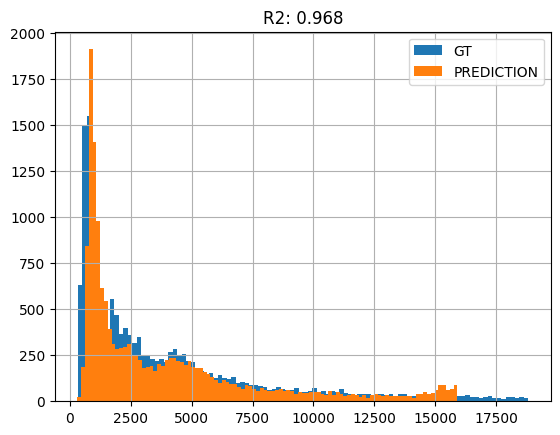

In [56]:

preds = model.predict(X_test)
# Проверяем модель MLP на выборке Diamonds
score_MLP = r2_score(y_test, preds)
plt.title(f'R2: {str(score_MLP)[:5]}')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.hist(preds.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.legend()
plt.grid();